## Error analysis, GPT-4-tubro, Institution A

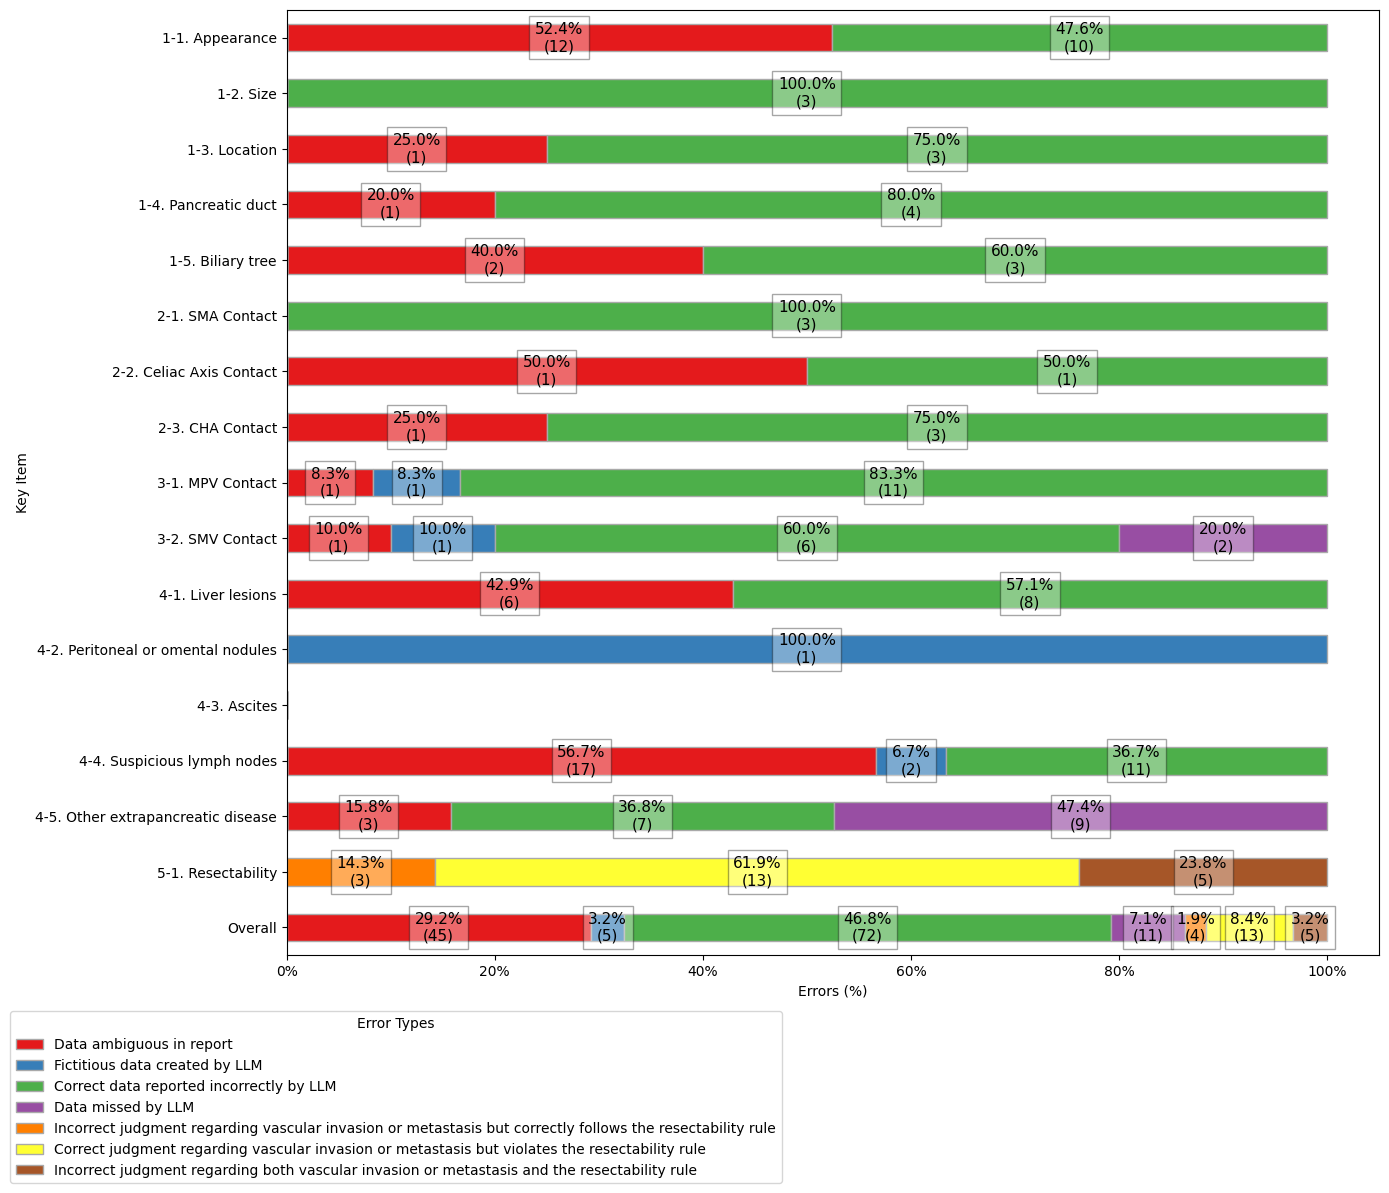

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import seaborn as sns

# Load your data
data = pd.read_excel('error_data.xlsx')

# Extract columns related to error codes
error_code_columns = [col for col in data.columns if 'error_code' in col]
error_data = data[error_code_columns]

# Aggregate error codes across all items
error_summary = error_data.apply(pd.Series.value_counts).fillna(0).T

# Rename columns and index for clearer interpretation
error_summary.columns = [
    'Correct (No Error)',
    'Data ambiguous in report',
    'Fictitious data created by LLM',
    'Correct data reported incorrectly by LLM',
    'Data missed by LLM',
    'Incorrect judgment regarding vascular invasion or metastasis but correctly follows the resectability rule',
    'Correct judgment regarding vascular invasion or metastasis but violates the resectability rule',
    'Incorrect judgment regarding both vascular invasion or metastasis and the resectability rule',
]
error_summary.index = [item.replace('_error_code', '') for item in error_summary.index]

# Reverse the order of the items
error_summary = error_summary.iloc[::-1]

# Add Overall to the error_summary DataFrame
overall_totals = error_summary.sum(axis=0)
overall_row = pd.DataFrame([overall_totals], index=['Overall'])
error_summary_with_overall = pd.concat([overall_row, error_summary])  # Prepend the overall row

# Remove 'Correct (No Error)' column
error_summary_with_overall = error_summary_with_overall.drop(columns=['Correct (No Error)'])

# Normalize data to percentages
error_summary_percent = error_summary_with_overall.div(error_summary_with_overall.sum(axis=1), axis=0) * 100

# Create a horizontal bar chart for normalized data using Matplotlib
fig, ax = plt.subplots(figsize=(14, 12))

colors = sns.color_palette('Set1')

bars = error_summary_percent.plot(kind='barh', stacked=True, ax=ax, color=colors, edgecolor='darkgray')


# Add data labels
import math
for container in bars.containers:
    labels = [
        f'{w:.1f}%\n({int(math.ceil(w * error_summary_with_overall.sum(axis=1).iloc[i] / 100))})' if w > 0 else '' 
        for i, w in enumerate(container.datavalues)
    ]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=11, color='black', bbox=dict(facecolor='white', edgecolor='black', alpha=0.35))

# Format x-axis labels to show percentages
ax.xaxis.set_major_locator(FixedLocator(ax.get_xticks()))
ax.set_xticklabels([f'{int(x)}%' for x in ax.get_xticks()])

# Customize labels and title
ax.set_xlabel('Errors (%)')
ax.set_ylabel('Key Item')
ax.legend(title='Error Types', bbox_to_anchor=(0.1, -0.15), loc='center')

# save figure to 300 dpi TIFF file
plt.savefig('Figure.tiff', dpi=300, format='tiff')

# Show the plot
plt.tight_layout()
plt.show()
